In [1]:
from snownlp import SnowNLP
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
phone_type = "低端"
path = f"data\{phone_type}_sentiments.csv"
df = pd.read_csv(path)
df['日期'] = pd.to_datetime(df['日期'])

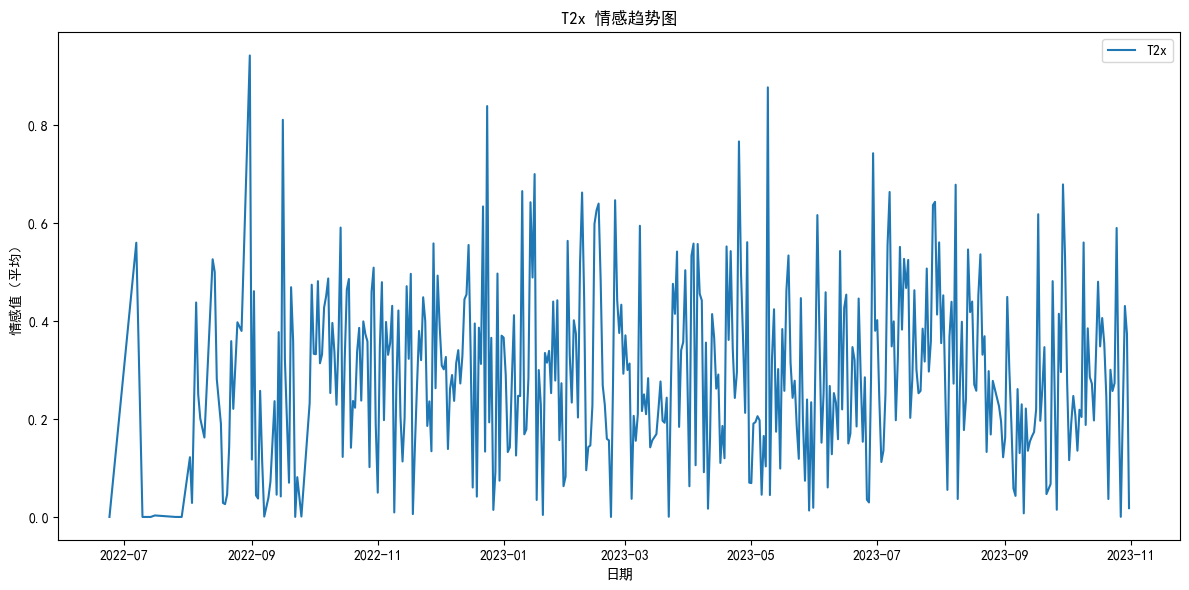

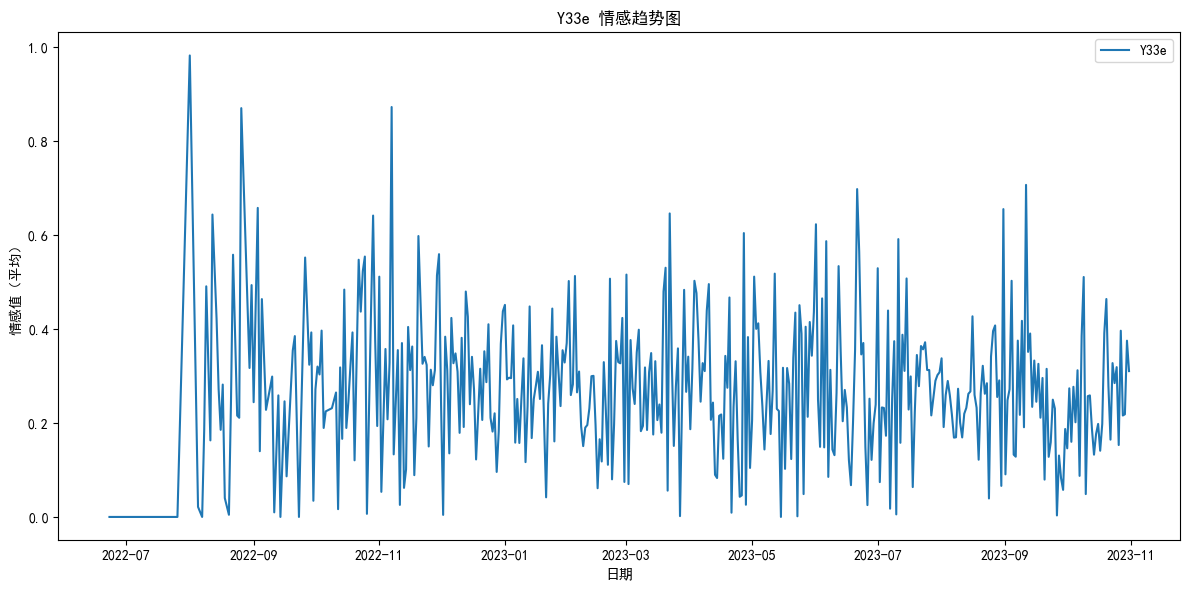

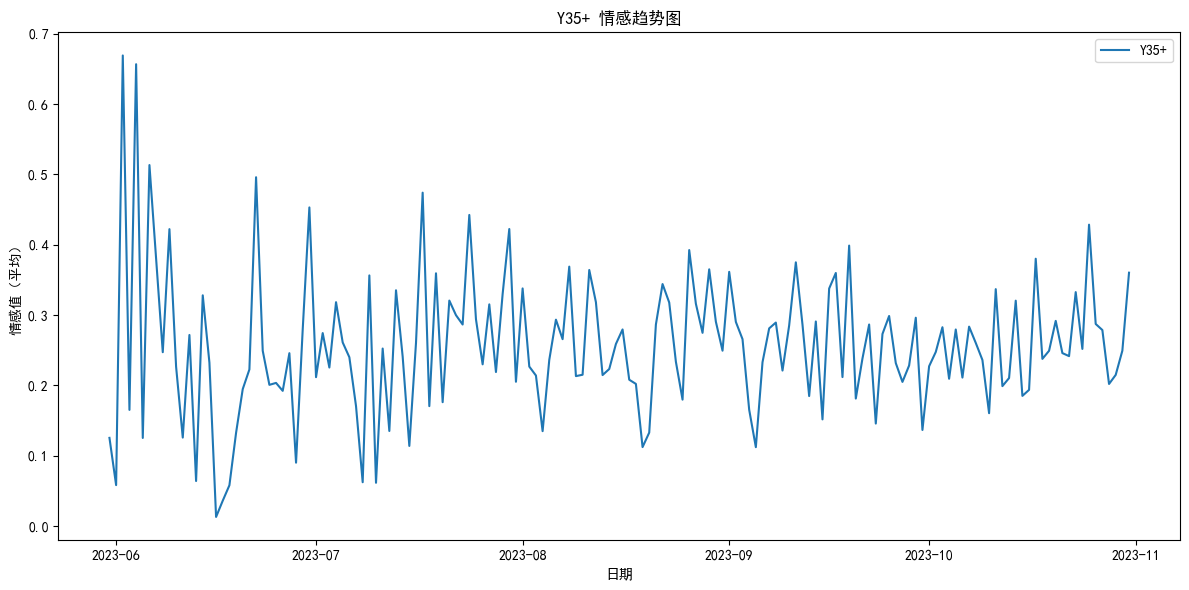

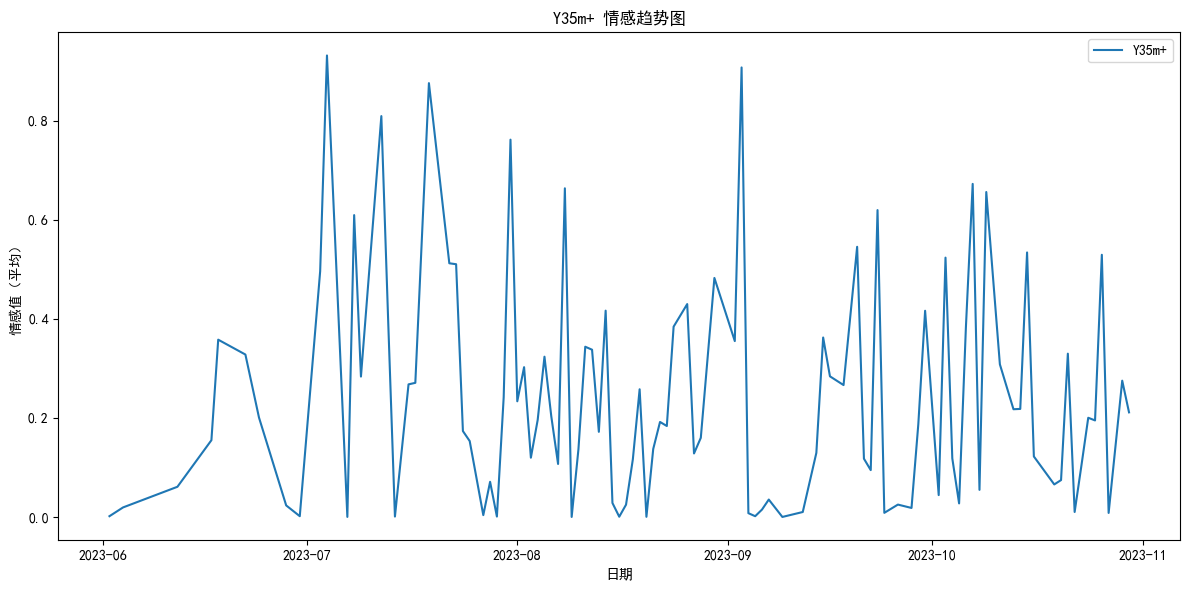

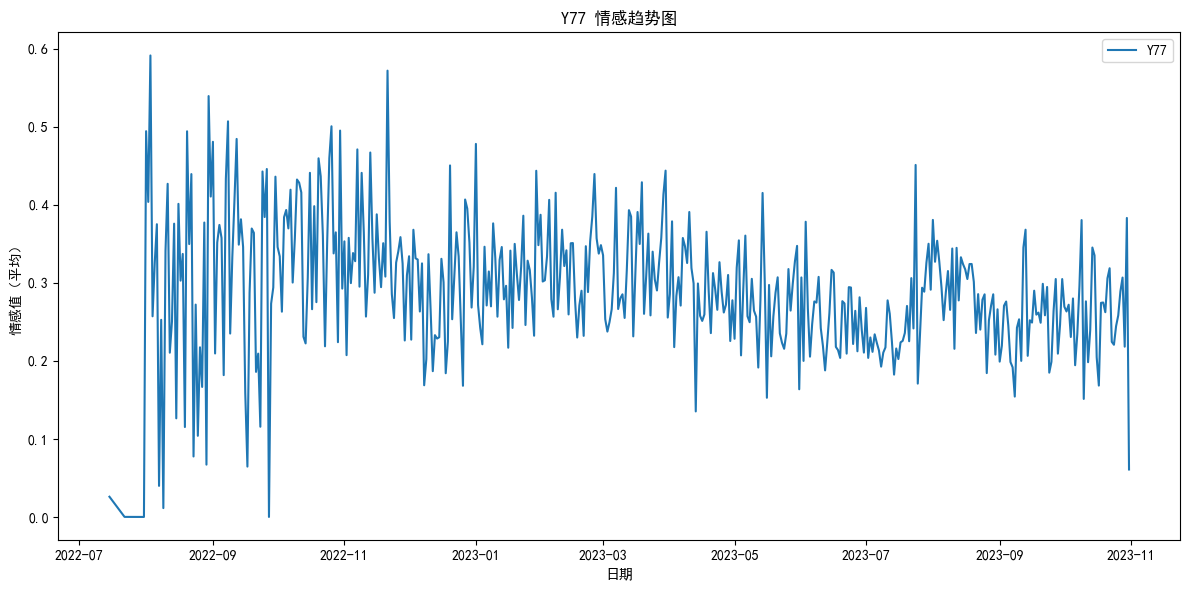

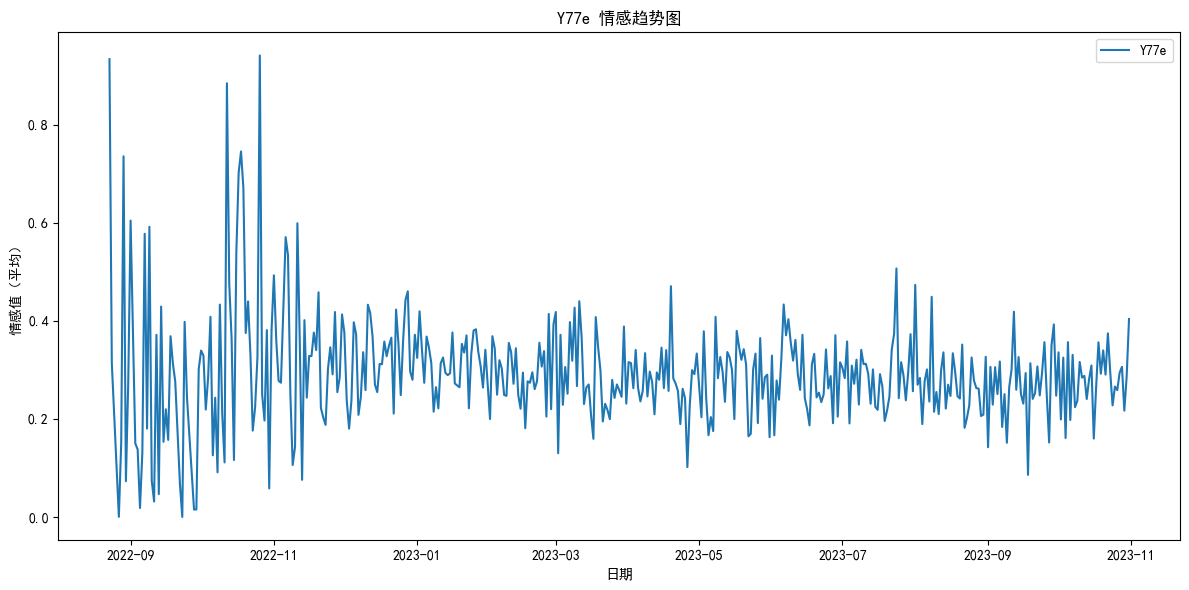

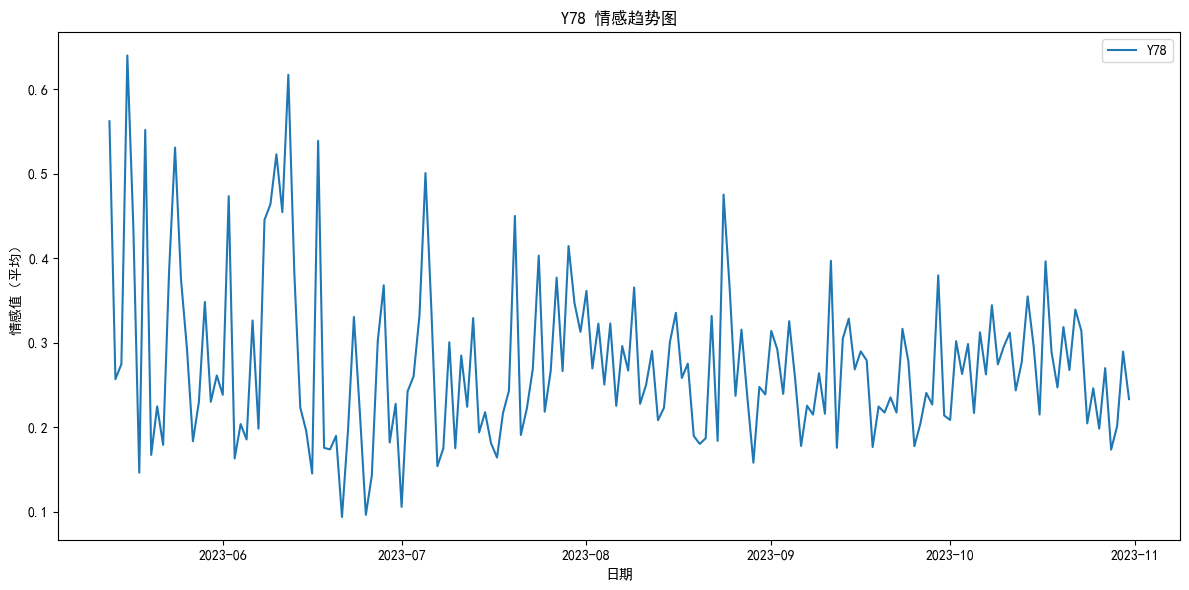

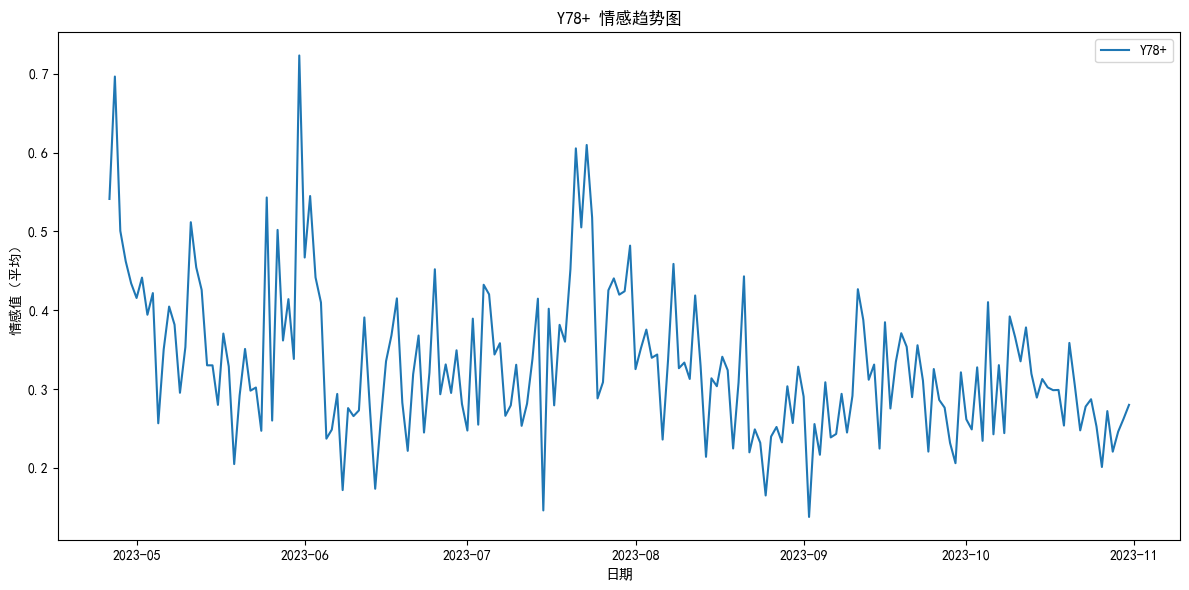

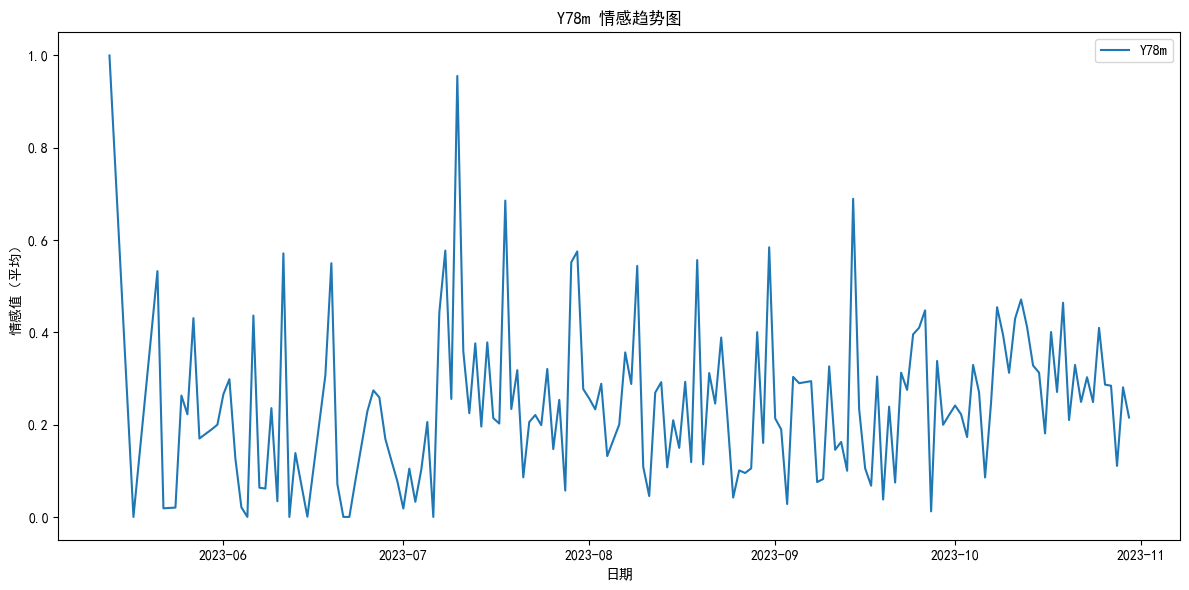

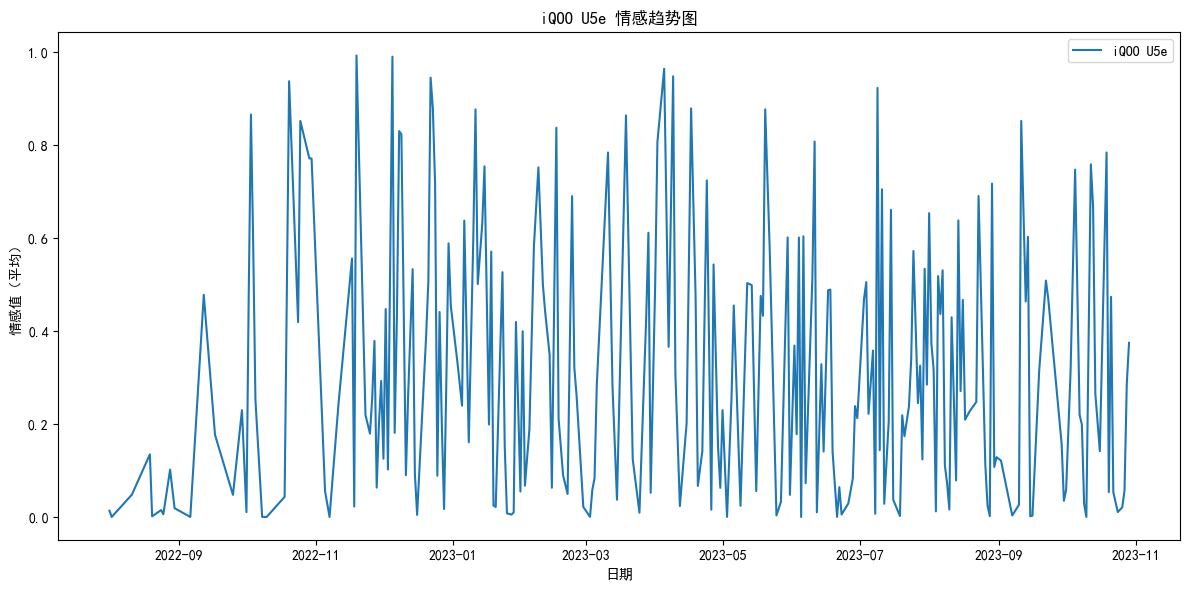

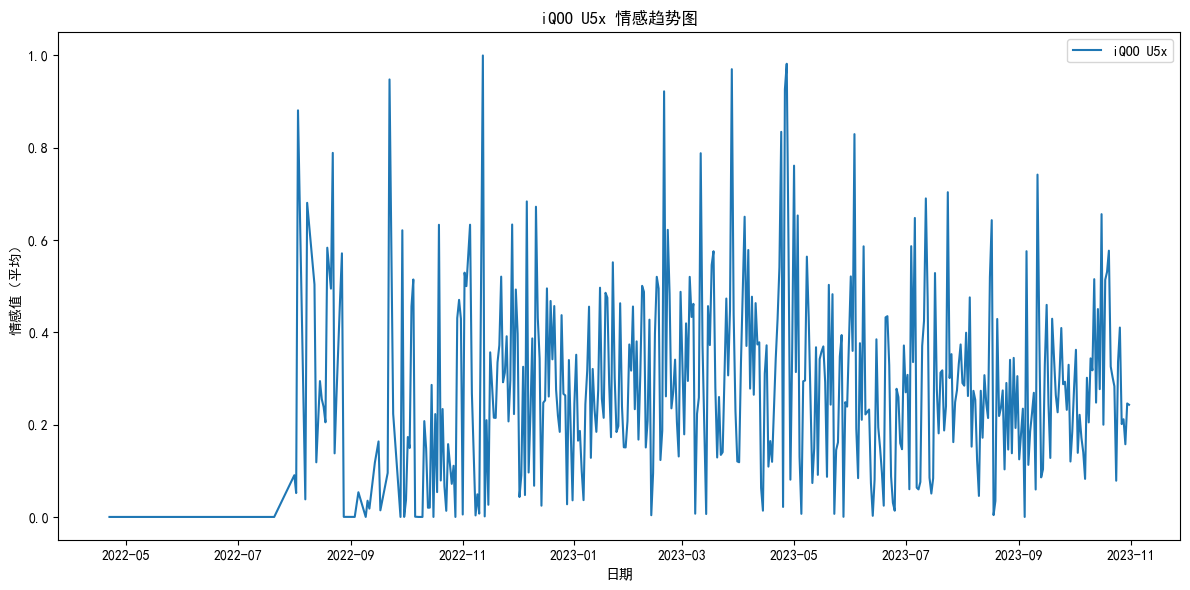

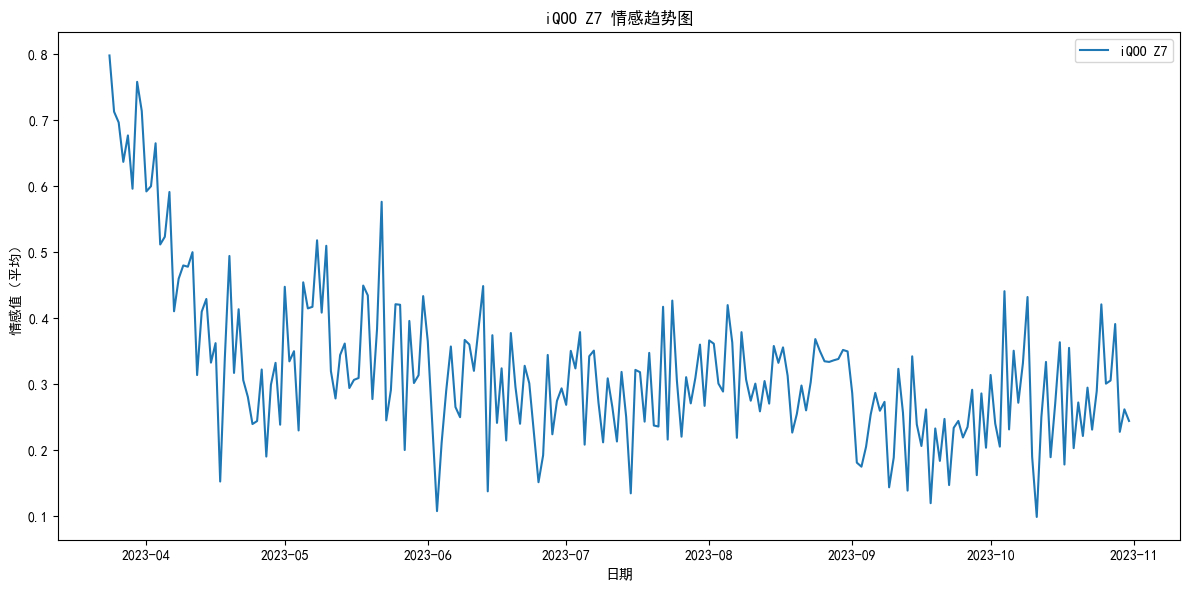

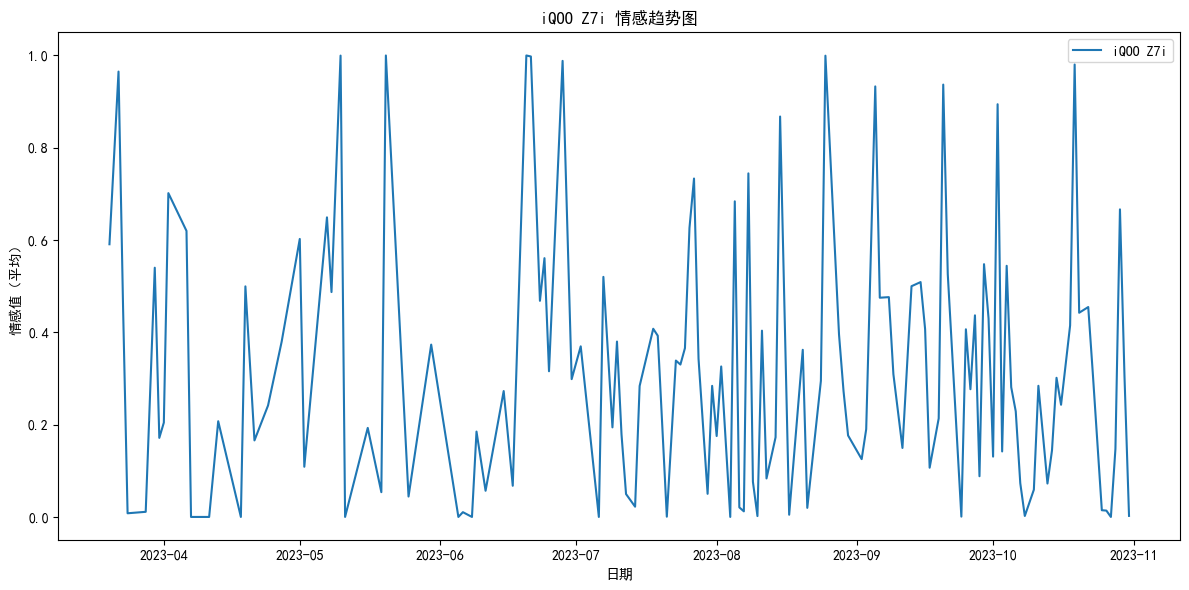

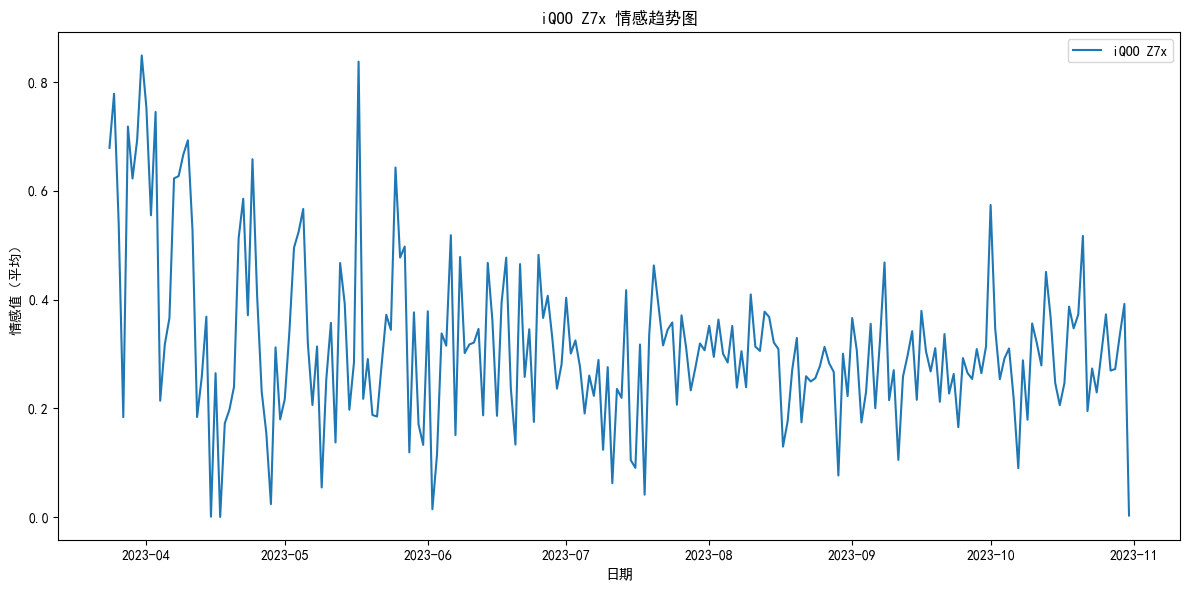

In [3]:
# 按照机型和日期分组，计算每天情感值的平均值
grouped_data = df.groupby(['机型', '日期'])['sentiment'].mean().reset_index()

# 遍历每个机型，画出不同机型的情感趋势图
for model in df['机型'].unique():
    model_data = grouped_data[grouped_data['机型'] == model]
    ticker_spacing = 7  # x轴数据的显示间隔为每隔7个显示一个
    
    plt.figure(figsize=(12, 6))
    plt.plot(model_data['日期'], model_data['sentiment'], label=model)
    plt.xlabel('日期')
    plt.ylabel('情感值（平均）')
    plt.title(f'{model} 情感趋势图')
    
    plt.legend()  # 添加图例
    plt.tight_layout()  # 调整布局，确保不会被遮挡
    plt.savefig(f"photo/{phone_type}/{model}情感趋势图.png")
    plt.show()

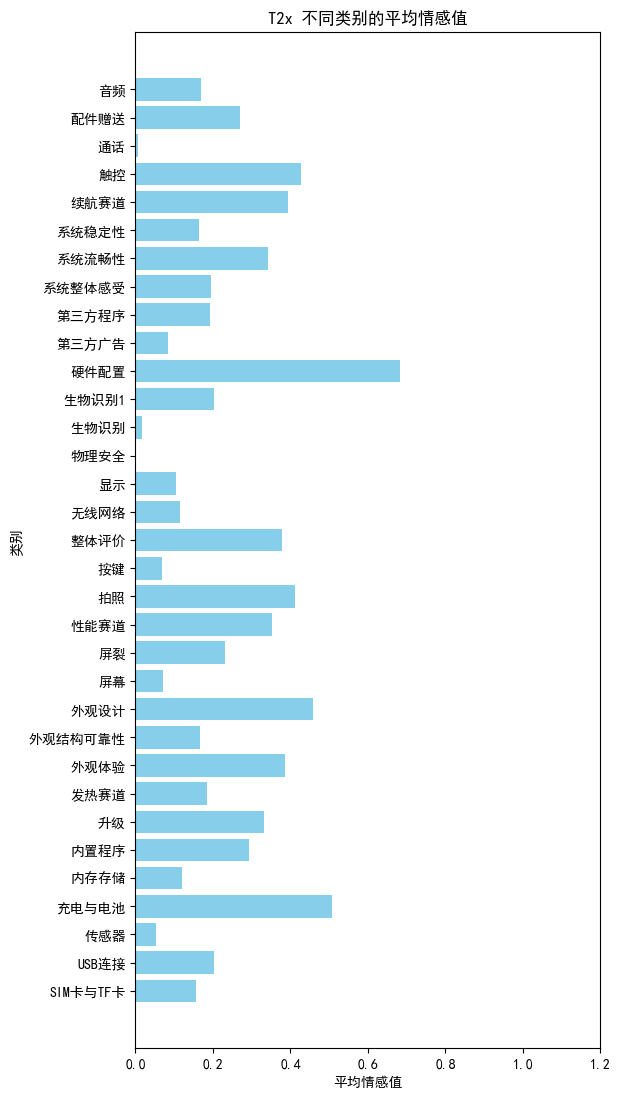

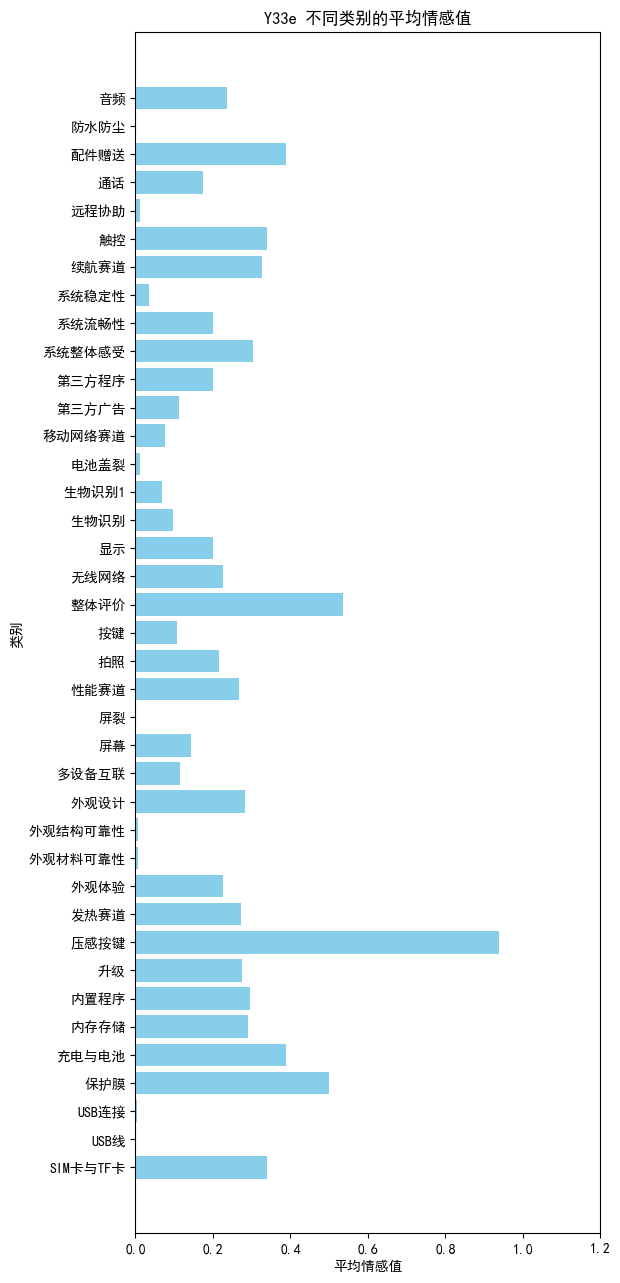

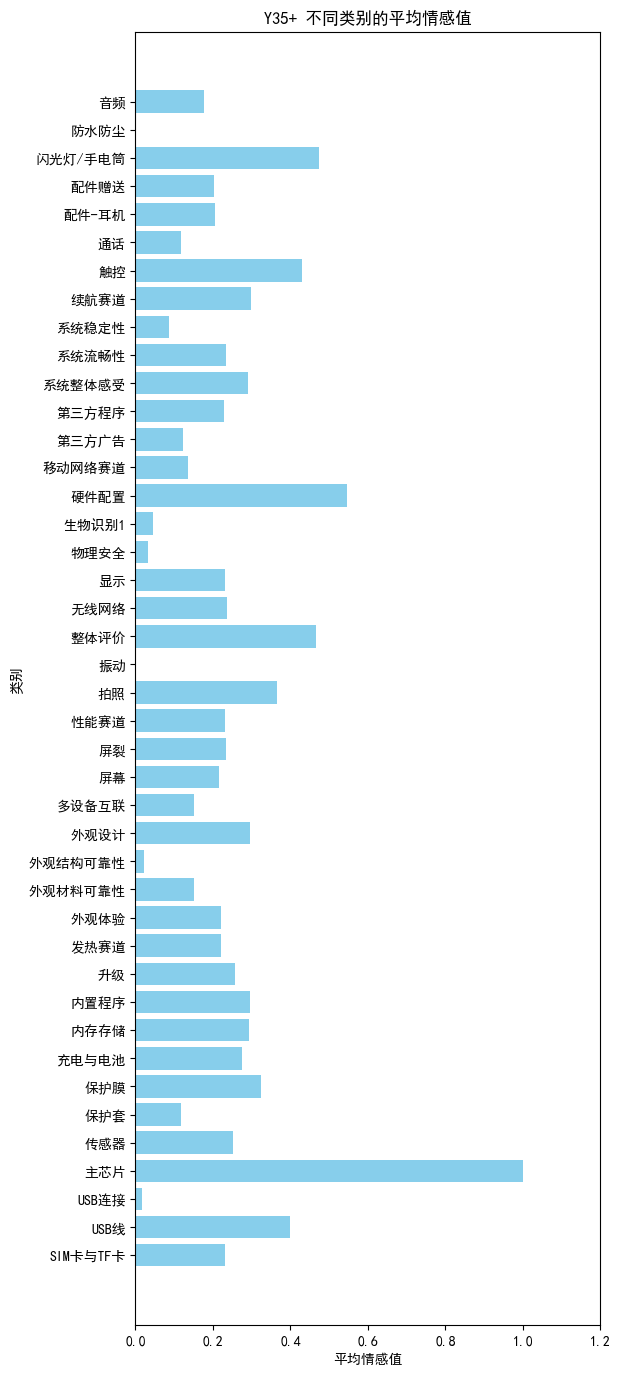

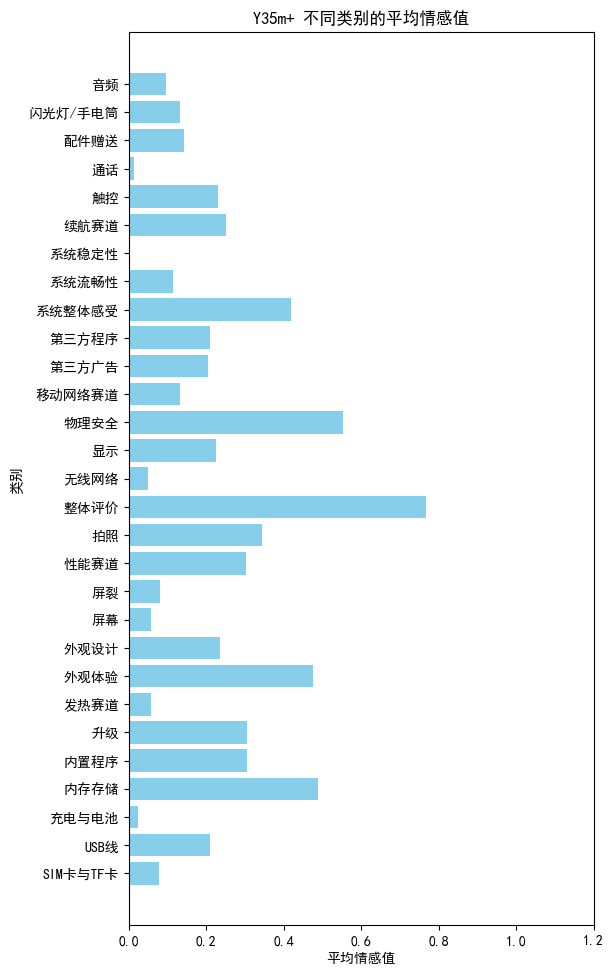

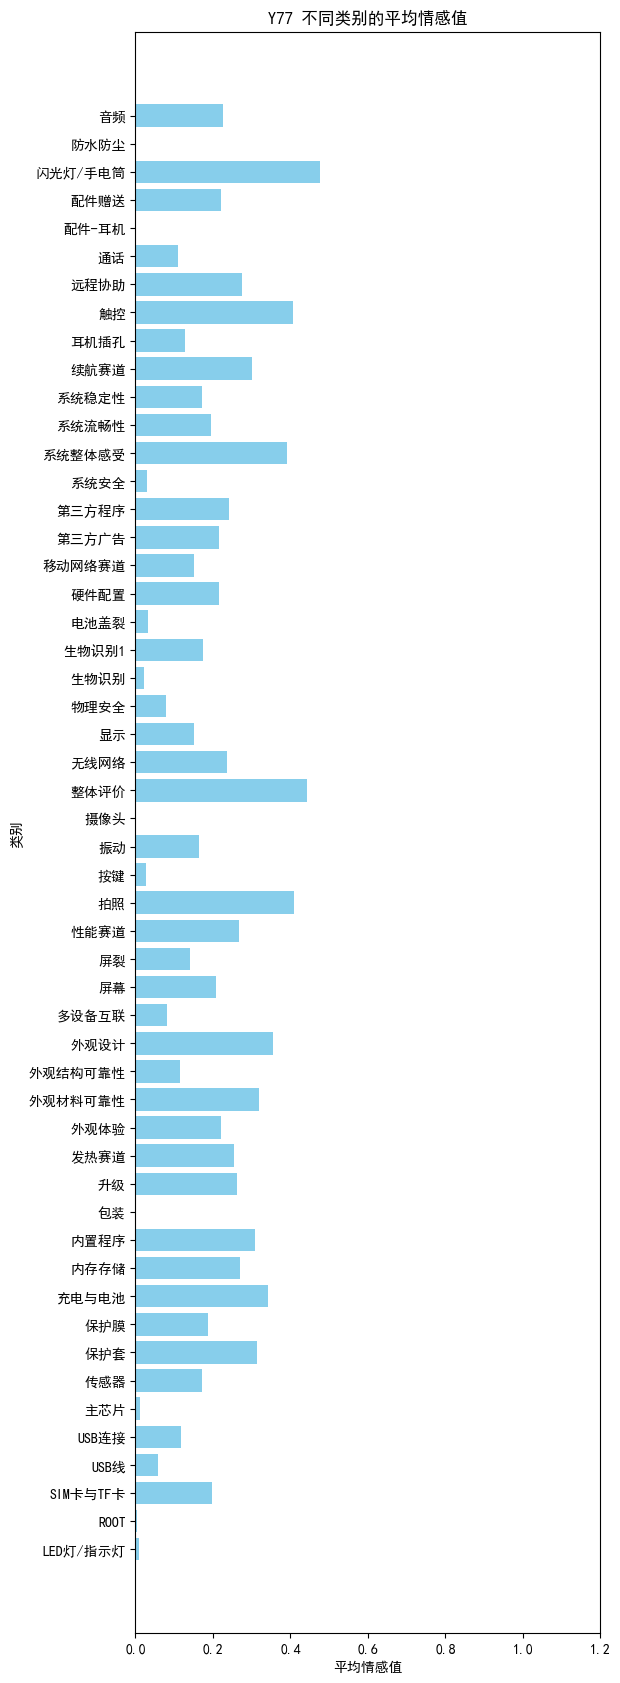

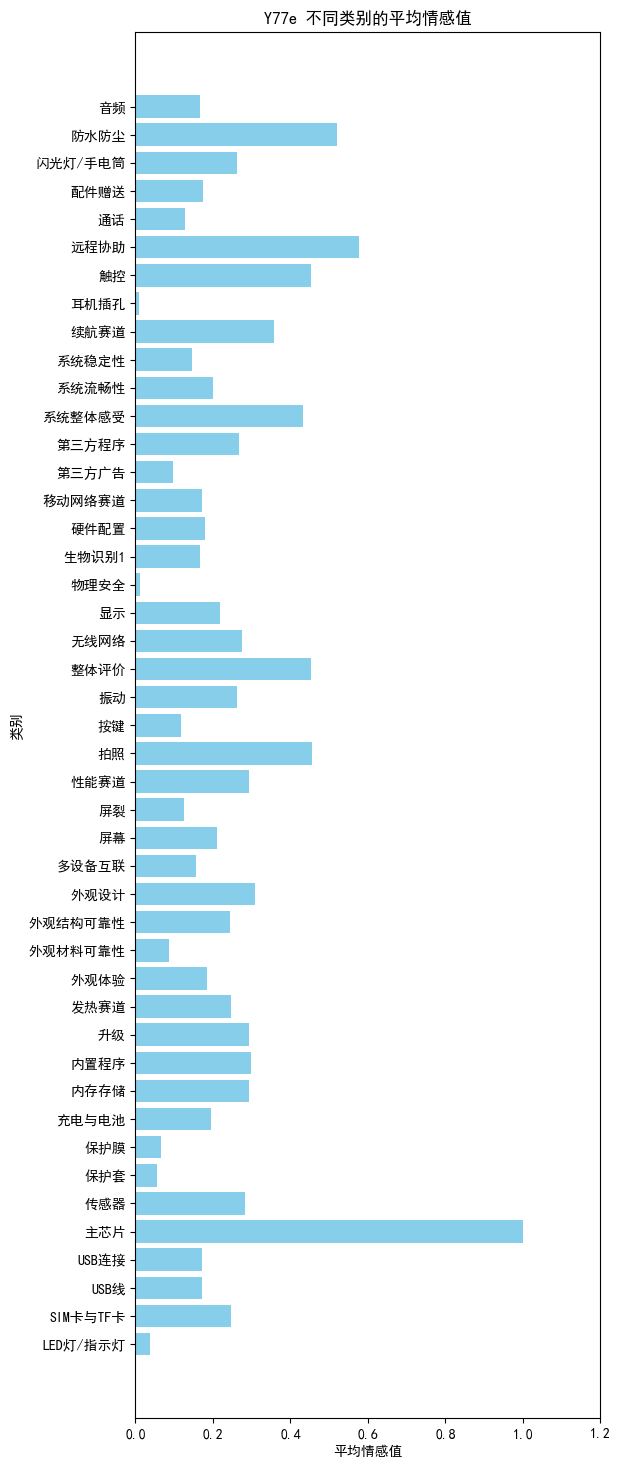

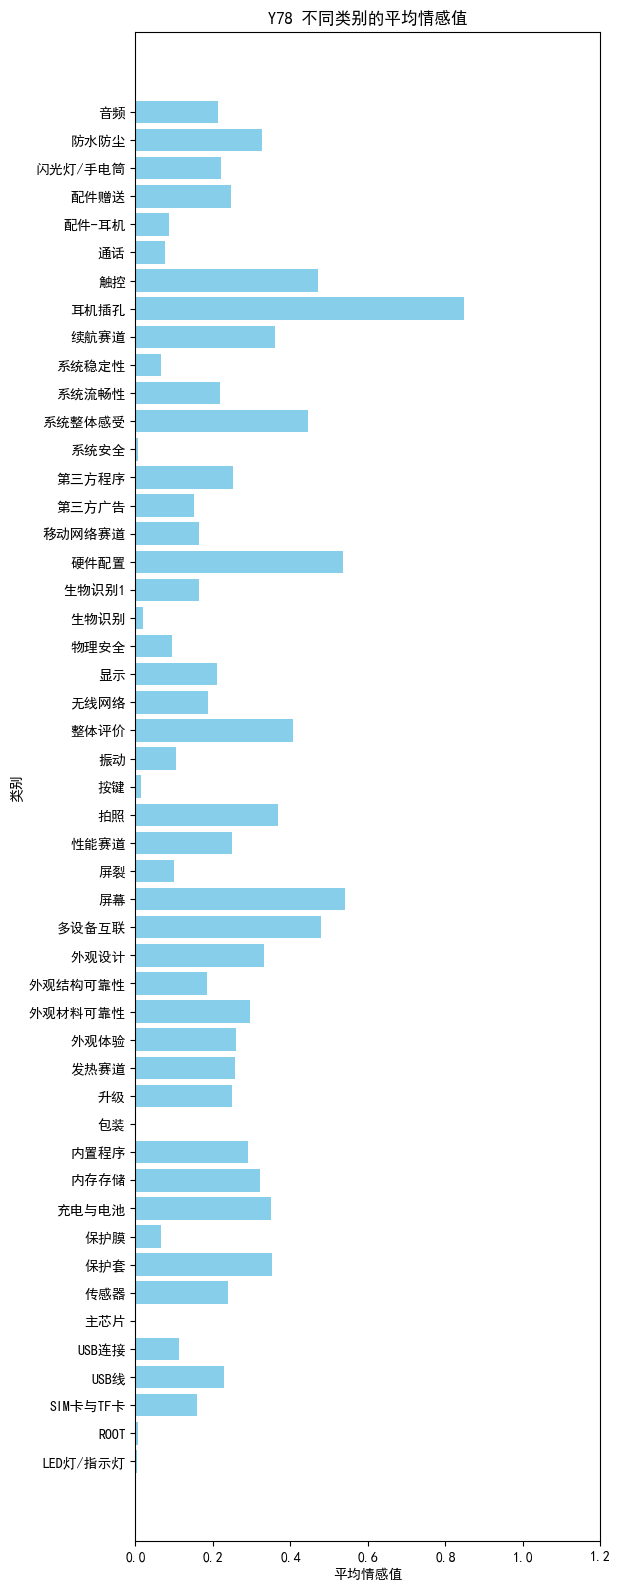

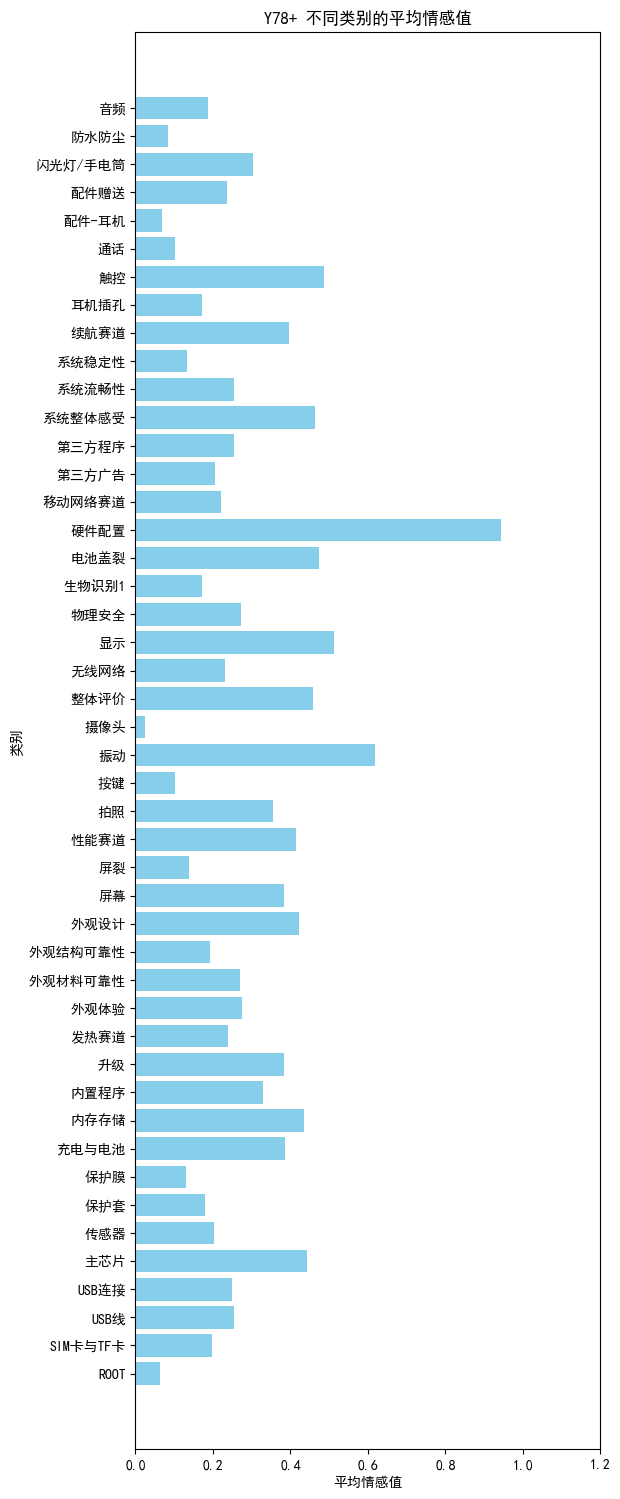

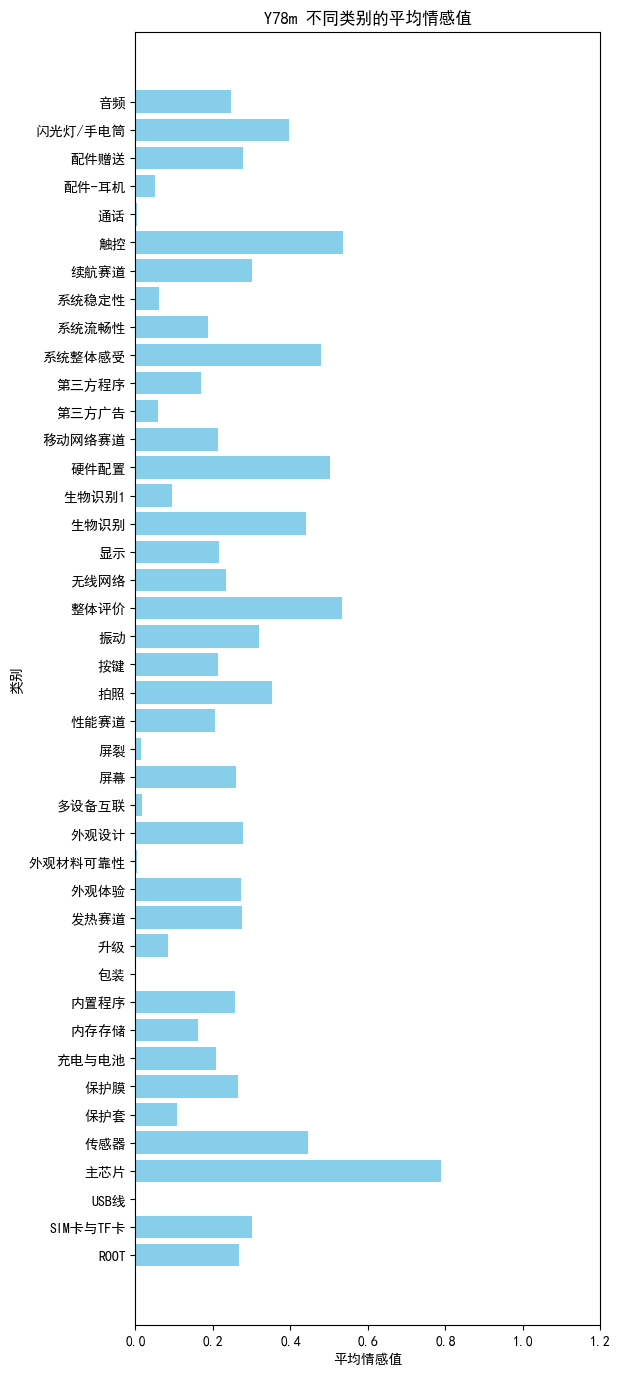

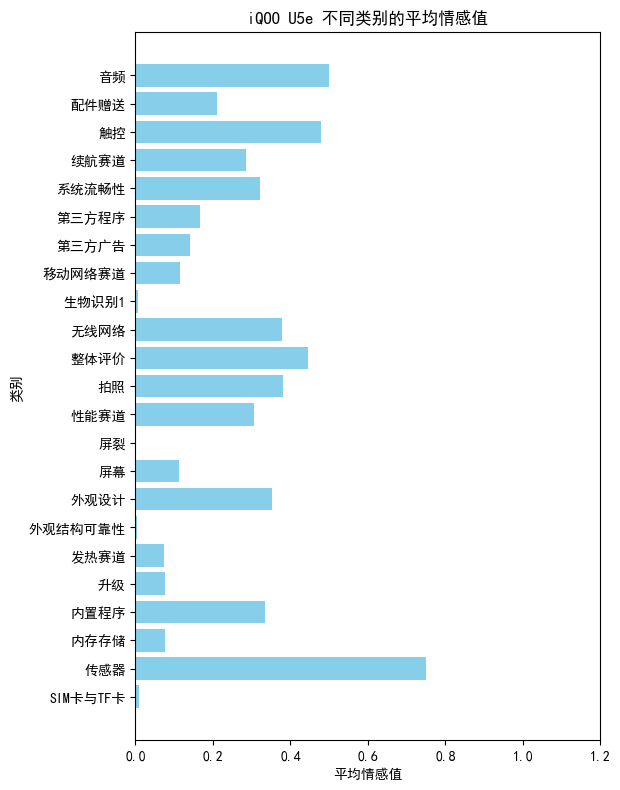

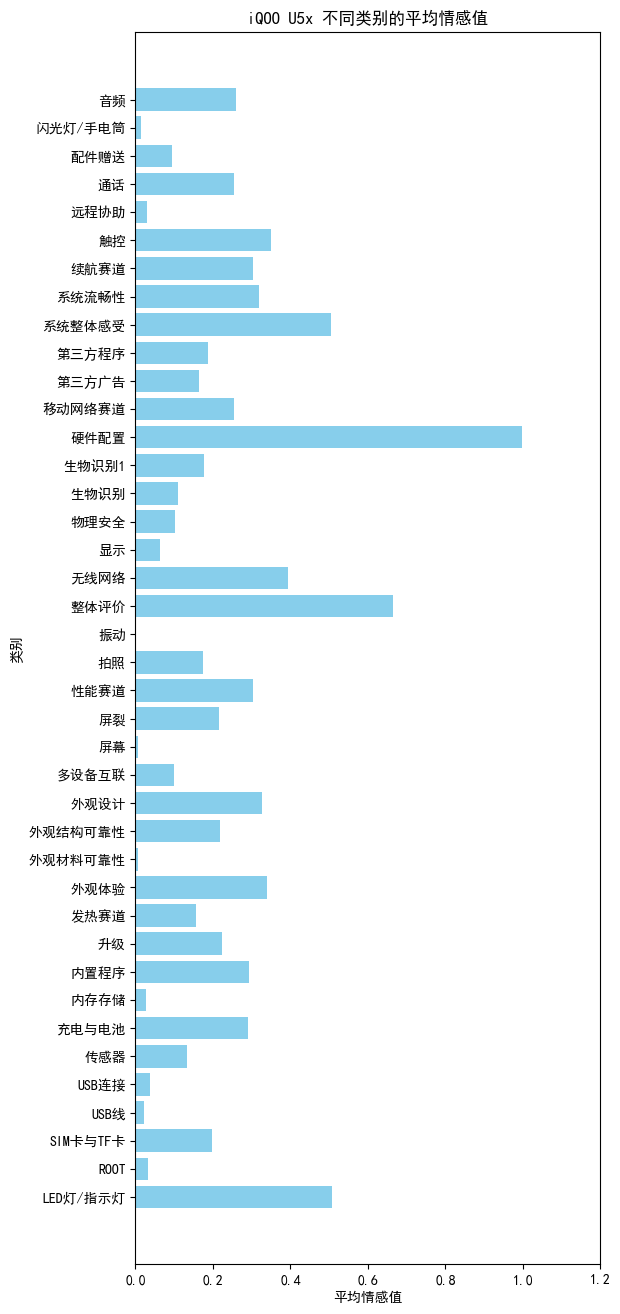

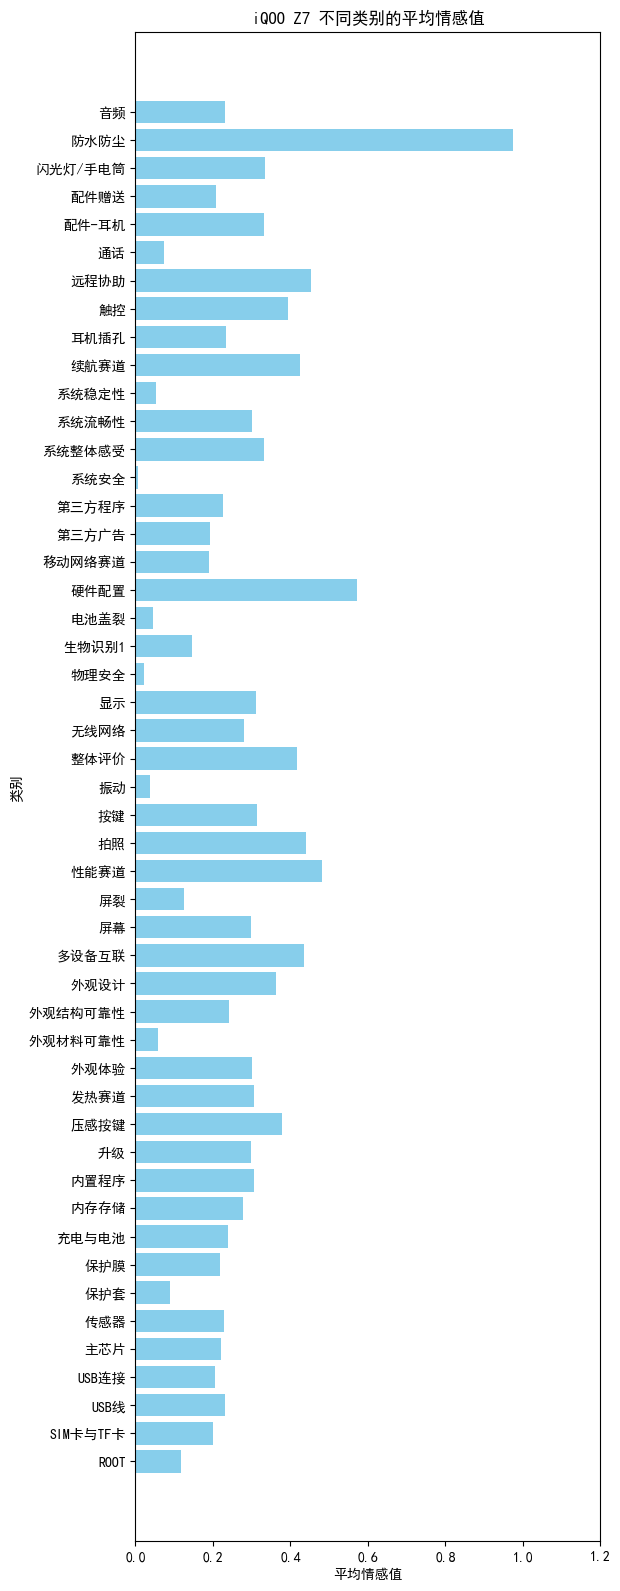

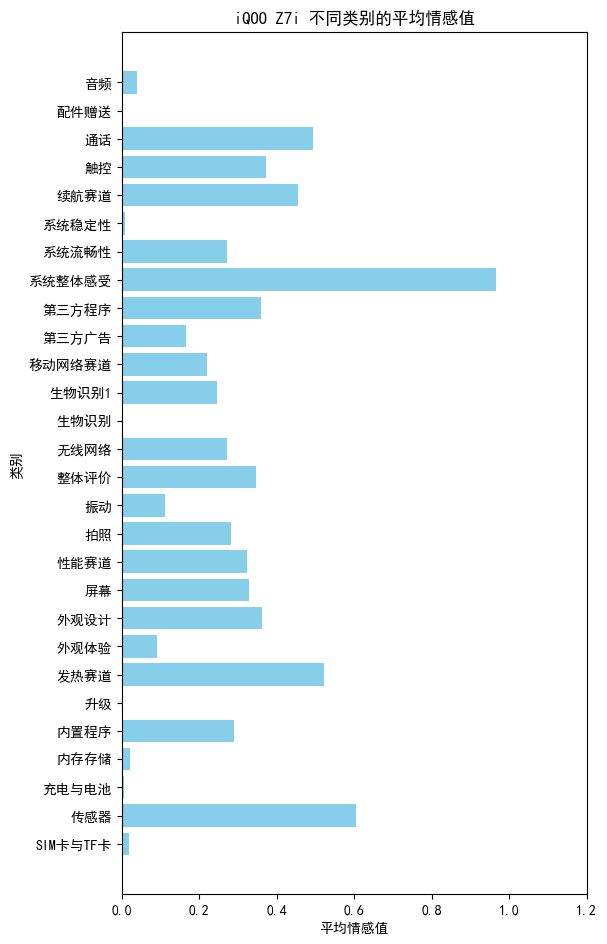

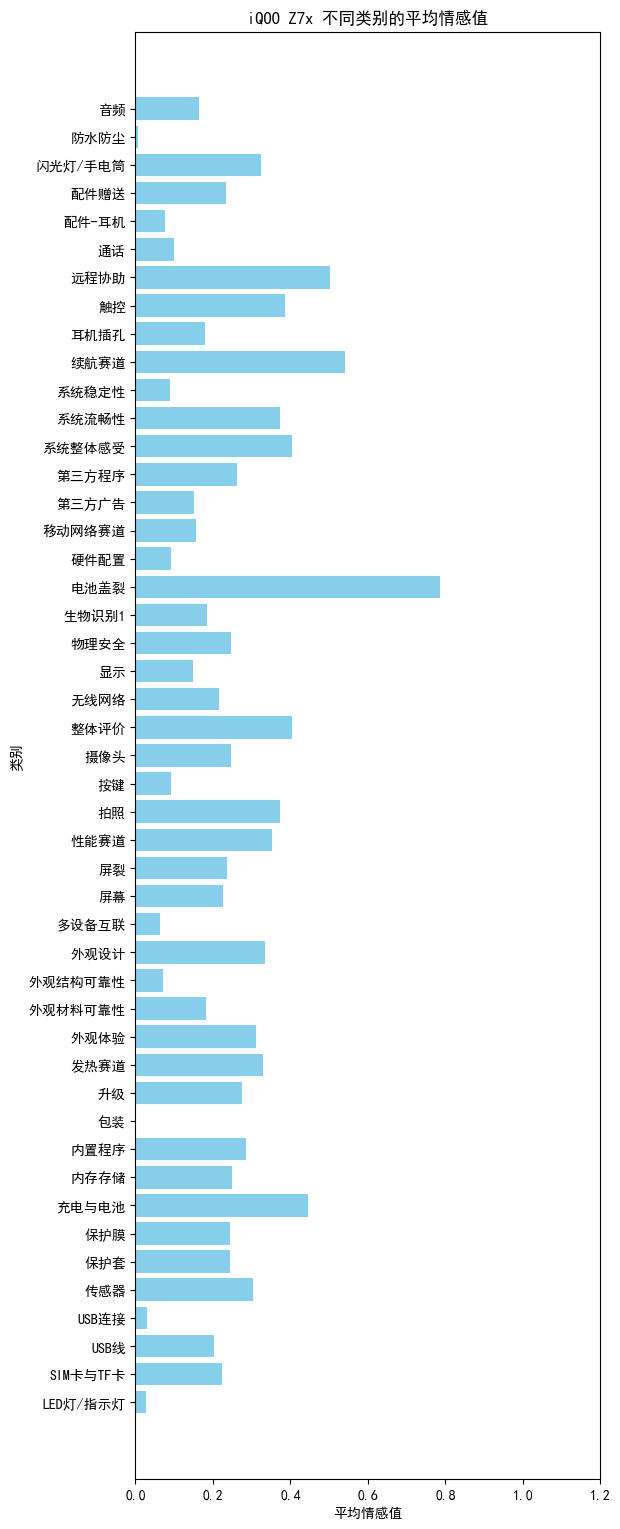

In [4]:
# 按照机型和类别分组，并计算每个组的平均情感值
grouped_data = df.groupby(['机型', '类别'])['sentiment'].mean().reset_index()

# 遍历每个机型，画出不同类别的平均情感值的横向柱状图
for model in df['机型'].unique():
    model_data = grouped_data[grouped_data['机型'] == model]
    
    plt.figure(figsize=(6, len(model_data) * 0.4))
    plt.barh(model_data['类别'], model_data['sentiment'], color='skyblue')
    plt.xlabel('平均情感值')
    plt.ylabel('类别')
    plt.title(f'{model} 不同类别的平均情感值')
    plt.xlim(0, 1.2)
    plt.savefig(f"photo/{phone_type}/{model}不同类别的平均情感值.png")
    plt.show()


In [5]:
grouped_data = df.groupby("机型")
joined_comment = grouped_data["描述"].apply(lambda x: ' '.join(x)).reset_index()
keywords = joined_comment['描述'].apply(lambda x: SnowNLP(x).keywords(40))

In [7]:
avoid_list = ['找','谢谢','日','Y78+','进',';@','@','版','S17','S16','S15','发','次',']['/
              ,'x90','充','掉', 'iQOO11', '11', '快','面', '频', '新', '更',"x80","X90s","x90s"/
              ,"想","捂","电","码","信","你好","希望","换","iqoo11","iQOO10","iQOO","开","顿","才",/
              "脸","机器","机","X90","太","时间","微","Fold","Fold+","Fold2","不","vivo","时","打开","拍"/
              ,";[","里","屏","后","都","手机","会","还","没","一个","送","看","好","];","上","人","店","大"/
              ,"说","下","服务","很","中","小","用户","号","X","去","月","天","买","点"]
def filter_description(description):
    return [word for word in description if word not in avoid_list]
keywords = keywords.apply(filter_description)
print(keywords)

0             [游戏, 卡, 系统, 更新, 显示, 设置, 软件, 屏幕, 功能, 电池]
1     [游戏, 卡, 退, 玩, 更新, 下载, 闪, 软件, 显示, 广告, 设置, 网络, 慢]
2                                  [游戏, 卡, 设置, 钱, 美女]
3                     [游戏, 卡, 充电, 声音, 售后, 晚上, 小时, 输入]
4                   [游戏, 卡, 软件, 系统, 显示, 玩, 设置, 更新, 退]
5                    [游戏, 卡, 设置, 显示, 软件, 玩, 下载, 钱, 出]
6                                 [卡, 钱, 游戏, Y78, 显示]
7                                  [游戏, 卡, 钱, 显示, 美女]
8                              [卡, 游戏, 设置, 耳机, 退, 充电]
9                    [游戏, 卡, 玩, 钱, 信息, 系统, 软件, 年, 退款]
10           [游戏, 卡, 软件, 显示, 玩, 设置, 下载, 系统, 更新, 退, 死]
11             [游戏, 钱, 卡, Z7, 系统, 显示, z7, 屏幕, 电池, 充电]
12    [游戏, 卡, 玩, 钱, 下载, 系统, 版本, 设置, z7i, 反馈, 语音, Z7i]
13                     [卡, 游戏, 电池, 设置, 显示, 系统, 钱, 功能]
Name: 描述, dtype: object


In [8]:
final_keywords = pd.concat([joined_comment["机型"],keywords],axis = 1)
final_keywords.rename(columns={'描述': '关键词'}, inplace=True)
print(final_keywords)

          机型                                              关键词
0        T2x          [游戏, 卡, 系统, 更新, 显示, 设置, 软件, 屏幕, 功能, 电池]
1       Y33e  [游戏, 卡, 退, 玩, 更新, 下载, 闪, 软件, 显示, 广告, 设置, 网络, 慢]
2       Y35+                               [游戏, 卡, 设置, 钱, 美女]
3      Y35m+                  [游戏, 卡, 充电, 声音, 售后, 晚上, 小时, 输入]
4        Y77                [游戏, 卡, 软件, 系统, 显示, 玩, 设置, 更新, 退]
5       Y77e                 [游戏, 卡, 设置, 显示, 软件, 玩, 下载, 钱, 出]
6        Y78                              [卡, 钱, 游戏, Y78, 显示]
7       Y78+                               [游戏, 卡, 钱, 显示, 美女]
8       Y78m                           [卡, 游戏, 设置, 耳机, 退, 充电]
9   iQOO U5e                 [游戏, 卡, 玩, 钱, 信息, 系统, 软件, 年, 退款]
10  iQOO U5x         [游戏, 卡, 软件, 显示, 玩, 设置, 下载, 系统, 更新, 退, 死]
11   iQOO Z7           [游戏, 钱, 卡, Z7, 系统, 显示, z7, 屏幕, 电池, 充电]
12  iQOO Z7i  [游戏, 卡, 玩, 钱, 下载, 系统, 版本, 设置, z7i, 反馈, 语音, Z7i]
13  iQOO Z7x                   [卡, 游戏, 电池, 设置, 显示, 系统, 钱, 功能]


In [9]:
final_keywords.to_csv(f"data\{phone_type}_keyword.csv",index=False)

内置程序        42565
性能赛道        25344
续航赛道         8717
外观设计         7924
发热赛道         4366
第三方程序        1243
外观体验         1197
触控           1178
配件赠送         1017
系统流畅性         848
无线网络          775
屏裂            760
升级            668
音频            665
拍照            452
充电与电池         448
显示            418
通话            367
移动网络赛道        336
内存存储          335
整体评价          329
屏幕            321
生物识别1         247
保护膜           243
外观材料可靠性       194
SIM卡与TF卡      183
传感器           169
系统整体感受        169
外观结构可靠性       138
系统稳定性         101
硬件配置           87
保护套            75
USB线           68
第三方广告          46
物理安全           42
USB连接          35
振动             34
闪光灯/手电筒        31
按键             29
防水防尘           21
电池盖裂           18
压感按键           16
耳机插孔           15
多设备互联          14
配件-耳机          14
远程协助           11
主芯片             7
摄像头             6
生物识别            6
ROOT            5
HDMI            4
系统安全            3
LED灯/指示灯        2
包装              1
Name: 类别, dtype: int64


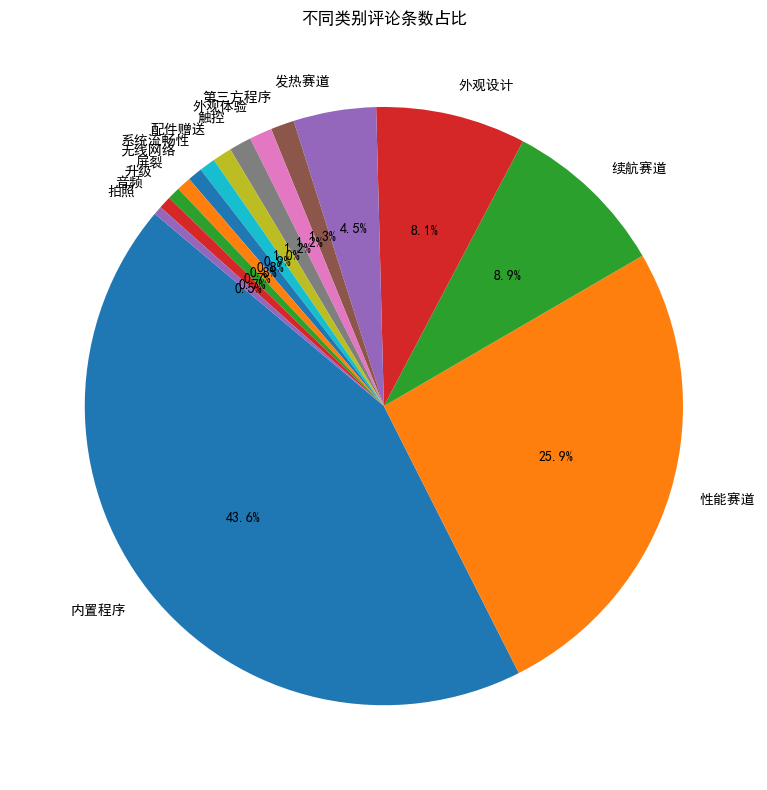

In [24]:
path_type = "高端"
path = f"data\{path_type}_sentiments.csv"
df = pd.read_csv(path)
df['日期'] = pd.to_datetime(df['日期'])
category_counts = df['类别'].value_counts()
print(category_counts)
plt.figure(figsize=(8, 8))
top_categories = category_counts.head(15)
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, labeldistance=1.1)

plt.title('不同类别评论条数占比')
plt.tight_layout()
plt.savefig(f"photo/{path_type}/{path_type}饼图.png")
plt.show()